Exercise 1. Distribution of female heights - 1

Assume the distribution of female heights is approximated by a normal distribution with a mean of 64 inches and a standard deviation of 3 inches. If we pick a female at random, what is the probability that she is 5 feet or shorter?

In [5]:
import torch

femHeight = torch.distributions.Normal(torch.tensor([64.0]), torch.tensor([3.0]))

fiveFtInInches = torch.tensor([5 * 12], dtype=torch.float32)

print(femHeight.cdf(fiveFtInInches).item())

0.09121119976043701


Exercise 2. Distribution of female heights - 2

Assume the distribution of female heights is approximated by a normal distribution with a mean of 64 inches and a standard deviation of 3 inches. If we pick a female at random, what is the probability that she is 6 feet or taller?

In [6]:
sixFtInInches = torch.tensor([6 * 12], dtype=torch.float32)
probSixFtOrTaller = 1.0 - femHeight.cdf(sixFtInInches).item()

print(probSixFtOrTaller)

0.0038303732872009277


Exercise 3. Distribution of female heights - 3

Assume the distribution of female heights is approximated by a normal distribution with a mean of 64 inches and a standard deviation of 3 inches. If we pick a female at random, what is the probability that she is between 61 and 67 inches?

In [7]:
probBetween61and67 = femHeight.cdf(torch.tensor([67], dtype=torch.float32)) - femHeight.cdf(torch.tensor([61], dtype=torch.float32))
print(probBetween61and67.item())

tensor([0.6827])


Exercise 6. Distribution of male heights

Imagine the distribution of male adults is approximately normal with an average of 69 inches and a standard deviation of 3 inches. How tall is a male in the 99th percentile?
Instructions
100 XP

    Determine the height of a man in the 99th percentile, given an average height of 69 inches and a standard deviation of 3 inches.


In [12]:
import torch

menHeight = torch.distributions.Normal(torch.tensor([69.0]), torch.tensor([3.0]))
print(menHeight.icdf(torch.tensor([0.99])).item())

75.97904205322266


Exercise 7. Distribution of IQ scores

The distribution of IQ scores is approximately normally distributed. The average is 100 and the standard deviation is 15. Suppose you want to know the distribution of the person with the highest IQ in your school district, where 10,000 people are born each year.

Generate 10,000 IQ scores 1,000 times using a Monte Carlo simulation. Make a histogram of the highest IQ scores.
Instructions
100 XP

    Use the function rnorm to generate a random distribution of 10,000 values with a given average and standard deviation.
    Use the function max to return the largest value from a supplied vector.
    Repeat the previous steps a total of 1,000 times. Store the vector of the top 1,000 IQ scores as highestIQ.
    Plot the histogram of values using the function hist.


(array([  3.,   7.,  10.,  48.,  62.,  87., 110.,  94., 101.,  89.,  85.,
         61.,  48.,  32.,  36.,  31.,  24.,  18.,  17.,  10.,  10.,   7.,
          1.,   3.,   2.,   0.,   3.,   0.,   0.,   1.]),
 array([147.78128052, 148.84357656, 149.9058726 , 150.96816864,
        152.03046468, 153.09276072, 154.15505676, 155.2173528 ,
        156.27964884, 157.34194489, 158.40424093, 159.46653697,
        160.52883301, 161.59112905, 162.65342509, 163.71572113,
        164.77801717, 165.84031321, 166.90260925, 167.96490529,
        169.02720133, 170.08949738, 171.15179342, 172.21408946,
        173.2763855 , 174.33868154, 175.40097758, 176.46327362,
        177.52556966, 178.5878657 , 179.65016174]),
 <a list of 30 Patch objects>)

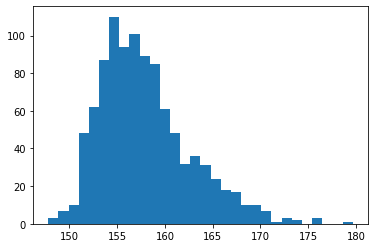

In [25]:
import pyro
import torch
import matplotlib.pyplot as plt

iqScore = pyro.distributions.Normal(torch.tensor([100.0]), torch.tensor([15.0]))

def iqScoreSample():
    with pyro.plate("iq", 10000):
        return pyro.sample("iq", iqScore)
    
maxIq = []
for _ in range(1000):
    maxIq.append(torch.max(iqScoreSample()).item())


plt.hist(maxIq, bins=30) 

In [9]:
import torch
import pyro

pyro.set_rng_seed(16)

actDist = pyro.distributions.Normal(torch.tensor([20.9]), torch.tensor([5.7]))

act_scores = None
with pyro.plate("act", 10000):
    act_scores = pyro.sample("act", actDist)

print(torch.mean(act_scores).item())
print(torch.std(act_scores).item())
print(torch.where(act_scores >= 36.0, torch.ones(1), torch.zeros(1)).nonzero().size()[0])

print(torch.where(act_scores >= 30.0, torch.ones(1), torch.zeros(1)).nonzero().size()[0] / 10000)
print(torch.where(act_scores <= 10.0, torch.ones(1), torch.zeros(1)).nonzero().size()[0] / 10000)

20.923097610473633
5.661186695098877
44
0.0556
0.0277


In [12]:
import torch
import pyro

x = torch.arange(1,37)
print(x)
y = torch.exp(actDist.log_prob(x))
print(y)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])
tensor([0.0002, 0.0003, 0.0005, 0.0009, 0.0014, 0.0023, 0.0036, 0.0054, 0.0079,
        0.0112, 0.0155, 0.0207, 0.0268, 0.0336, 0.0410, 0.0484, 0.0554, 0.0615,
        0.0662, 0.0691, 0.0700, 0.0687, 0.0654, 0.0604, 0.0540, 0.0469, 0.0395,
        0.0322, 0.0255, 0.0196, 0.0146, 0.0105, 0.0074, 0.0050, 0.0033, 0.0021])


In [18]:
z_scores = (act_scores - torch.mean(act_scores).item()) / torch.std(act_scores).item()
z2sds = torch.where(z_scores >= 2.0, torch.ones(1), torch.zeros(1)).nonzero().size()[0] / 10000
print(z2sds)

act2sds = torch.mean(act_scores).item() + 2 * torch.std(act_scores).item()
print(act2sds)
print(torch.where(act_scores >= act2sds, torch.ones(1), torch.zeros(1)).nonzero().size()[0] / 10000)

0.023
32.24547100067139
0.023


In [19]:
exp_actDist = pyro.distributions.Normal(torch.mean(act_scores), torch.std(act_scores))

print(exp_actDist.icdf(torch.tensor([0.975])))

tensor([32.0188])


In [22]:
print(actDist.cdf(x))
print(actDist.icdf(torch.tensor([0.95])))

tensor([2.4042e-04, 4.5693e-04, 8.4373e-04, 1.5138e-03, 2.6397e-03, 4.4740e-03,
        7.3722e-03, 1.1813e-02, 1.8412e-02, 2.7920e-02, 4.1208e-02, 5.9214e-02,
        8.2879e-02, 1.1304e-01, 1.5031e-01, 1.9499e-01, 2.4692e-01, 3.0546e-01,
        3.6944e-01, 4.3727e-01, 5.0700e-01, 5.7651e-01, 6.4372e-01, 7.0673e-01,
        7.6402e-01, 8.1454e-01, 8.5773e-01, 8.9355e-01, 9.2235e-01, 9.4481e-01,
        9.6180e-01, 9.7425e-01, 9.8311e-01, 9.8923e-01, 9.9331e-01, 9.9596e-01])
tensor([30.2757])


In [24]:
q = torch.arange(0.01,0.99,0.01)
sample_quantiles = exp_actDist.icdf(q)
theo_quantiles = actDist.icdf(q)